In [78]:
from matplotlib.pyplot import figure, rcParams
from conf_matplotlib import conf_matplotlib_oscuro
conf_matplotlib_oscuro()

In [79]:
from datetime import datetime, timedelta

In [80]:
from poliastro.maneuver import Maneuver

In [81]:
from astropy.coordinates import EarthLocation

In [297]:
from astropy import coordinates

In [357]:
coords[0][0]

<SphericalRepresentation (lon, lat, distance) in (rad, rad, km)
    (5.86138633, -0.00139141, 42158.23044008)
 (has differentials w.r.t.: 's')>

In [358]:
coords[-1]

[<SphericalRepresentation (lon, lat, distance) in (rad, rad, km)
     (5.72182825, -0.00122998, 42158.72657356)
  (has differentials w.r.t.: 's')>,
 datetime.datetime(2020, 4, 3, 16, 41, 5)]

In [351]:
coordinates.GeocentricTrueEcliptic(coords[0][0], obstime=coords[0][1])

<GeocentricTrueEcliptic Coordinate (equinox=J2000.000, obstime=2020-03-27 17:41:05): (lon, lat, distance) in (deg, deg, km)
    (335.83269881, -0.07972211, 42158.23044008)
 (pm_lon_coslat, pm_lat, radial_velocity) in (mas / yr, mas / yr, km / s)
    (4.74795984e+11, -5.11848922e+08, -0.00023234)>

In [353]:
coordinates.GeocentricTrueEcliptic(coords[0][0])

<GeocentricTrueEcliptic Coordinate (equinox=J2000.000, obstime=J2000.000): (lon, lat, distance) in (deg, deg, km)
    (335.83269881, -0.07972211, 42158.23044008)
 (pm_lon_coslat, pm_lat, radial_velocity) in (mas / yr, mas / yr, km / s)
    (4.74795984e+11, -5.11848922e+08, -0.00023234)>

In [354]:
coordinates.GeocentricTrueEcliptic(coords[-1][0])

<GeocentricTrueEcliptic Coordinate (equinox=J2000.000, obstime=J2000.000): (lon, lat, distance) in (deg, deg, km)
    (327.83661009, -0.07047282, 42158.72657356)
 (pm_lon_coslat, pm_lat, radial_velocity) in (mas / yr, mas / yr, km / s)
    (4.74784708e+11, -5.97809456e+08, -0.00027942)>

In [352]:
coordinates.GeocentricTrueEcliptic(coords[-1][0], obstime=coords[-1][1])

<GeocentricTrueEcliptic Coordinate (equinox=J2000.000, obstime=2020-04-03 16:41:05): (lon, lat, distance) in (deg, deg, km)
    (327.83661009, -0.07047282, 42158.72657356)
 (pm_lon_coslat, pm_lat, radial_velocity) in (mas / yr, mas / yr, km / s)
    (4.74784708e+11, -5.97809456e+08, -0.00027942)>

In [341]:
from astropy.coordinates import CartesianRepresentation, SphericalRepresentation
from astropy.coordinates import GeocentricTrueEcliptic

In [83]:
from astropy import units as u
from astropy.time import Time ,TimeDelta

In [84]:
from poliastro.twobody.thrust import change_inc_ecc
from poliastro.twobody import Orbit
from poliastro.bodies import Earth
from poliastro.twobody.propagation import cowell

In [102]:
from poliastro.plotting import OrbitPlotter2D, OrbitPlotter3D, StaticOrbitPlotter

In [187]:
from poliastro.core.perturbations import J2_perturbation

In [367]:
from poliastro.util import norm

In [388]:
ΔV = 0.035078249 * u.m/u.s
thruster_secs = 26.88 * u.s
duty_cycle = 0.112 * u.one
thruster_eff = 1 * u.one

duration = thruster_secs / duty_cycle
δv = ΔV/int(duration.value)

thruster_vec = [0,1,0]*δv

EWSK0398 = [Maneuver((duty_cycle*u.s, thruster_vec)) for i in range(int(duration.value))]

In [389]:
epoch = Time(2000, format='jyear') + TimeDelta(638594520*u.s)
r = [21688591.8, -36154596.3, -22139.6363]*u.m
v = [2636.61379, 1582.13661, -5.16579754]*u.m/u.s

s0 = Orbit.from_vectors(Earth, r=r, v=v, epoch=Time(epoch, format="jyear"))

In [390]:
norm(s0.v)

<Quantity 3074.88458577 m / s>

In [391]:
norm(sf.v).to(u.m/u.s)

<Quantity 3075.09089104 m / s>

In [392]:
mnvr_epoch = datetime(2020, 3, 27, 16, 37, 5)
ff_time = (mnvr_epoch - epoch.datetime).seconds
downtime = 1 - duty_cycle.value

In [393]:
s0 = s0.propagate(ff_time*u.s, method=cowell, ad=J2_perturbation,
                  J2=Earth.J2.value, R=Earth.R.to(u.km).value)

In [394]:
sf = s0

for pulse in EWSK0398:
    sf = sf.apply_maneuver(pulse)
    sf = sf.propagate(downtime*u.s, method=cowell, ad=J2_perturbation,
                      J2=Earth.J2.value, R=Earth.R.to(u.km).value)
    
s0 = s0.propagate((sf.epoch.datetime - s0.epoch.datetime).seconds*u.s, method=cowell,
                  ad=J2_perturbation, J2=Earth.J2.value, R=Earth.R.to(u.km).value)

In [395]:
coords_0 = []
coords_f = []

for i in range(24*7*2):
    s0 = s0.propagate(3600*u.s, method=cowell, ad=J2_perturbation,
                      J2=Earth.J2.value, R=Earth.R.to(u.km).value)
    coords_0.append([s0.represent_as(SphericalRepresentation), s0.epoch.datetime])
    
    sf = sf.propagate(3600*u.s, method=cowell, ad=J2_perturbation,
                      J2=Earth.J2.value, R=Earth.R.to(u.km).value)
    coords_f.append([sf.represent_as(SphericalRepresentation), sf.epoch.datetime])

In [396]:
from poliastro.core import perturbations

In [397]:
coords_0[0][0]

<SphericalRepresentation (lon, lat, distance) in (rad, rad, km)
    (5.8613851, -0.00139142, 42158.10796404)
 (has differentials w.r.t.: 's')>

In [398]:
s0

42157 x 42171 km x 0.1 deg (GCRS) orbit around Earth (♁) at epoch 2020.2743194983143 (TT)

In [399]:
sf

42157 x 42172 km x 0.1 deg (GCRS) orbit around Earth (♁) at epoch 2020.2743194983143 (TT)

In [400]:
def dt_long(time):
    from numpy import pi, radians
    τ = 2*pi
    hora = time.hour
    minuto = time.minute
    segundo = time.second
    l_hor = τ*hora/24
    l_min = τ*minuto/60/24
    l_seg = τ*segundo/60/60/24
    return l_hor + l_min + l_seg

In [401]:
τ = 2*pi
efem_prop_0 = [[coord.lon, coord.lat, time] for coord, time in coords_0]
efem_prop_f = [[coord.lon, coord.lat, time] for coord, time in coords_f]

longs_0, lats_0 = [], []
for lon, lat, tiempo in efem_prop_0:
    longs_0.append(degrees((lon.value - dt_long(tiempo))%-τ))
    lats_0.append(degrees(lat.value))

longs_f, lats_f = [], []
for lon, lat, tiempo in efem_prop_f:
    longs_f.append(degrees((lon.value - dt_long(tiempo))%-τ))
    lats_f.append(degrees(lat.value))

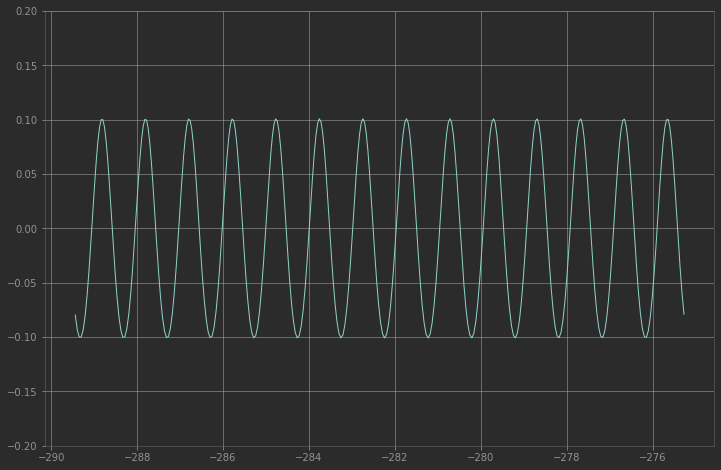

In [402]:
fig = figure(figsize=(12,8))
ax = fig.gca()
ax.plot(longs_0, lats_0 ,lw=1)
#ax.plot(longs_f, lats_f ,lw=1)
ax.set_ylim(-0.2, 0.2);

In [403]:
temp_0 = coords_0[0][0]
temp_f = coords_0[-1][0]

In [404]:
temp_0.lon.to(u.deg).value - 360, temp_f.lon.to(u.deg).value - 360

(-24.16737187772287, -25.004090477076545)

In [405]:
1436/60

23.933333333333334

In [227]:
δ_utc = 24*114.8/360
δ_utc_h = int(δ_utc)
δ_utc_m = int((δ_utc - δ_utc_h)*60)
δ_utc_s = (δ_utc - δ_utc_h - δ_utc_m/60)*60*60
δ_utc, δ_utc_h, δ_utc_m, δ_utc_s

(7.653333333333332, 7, 39, 11.99999999999668)

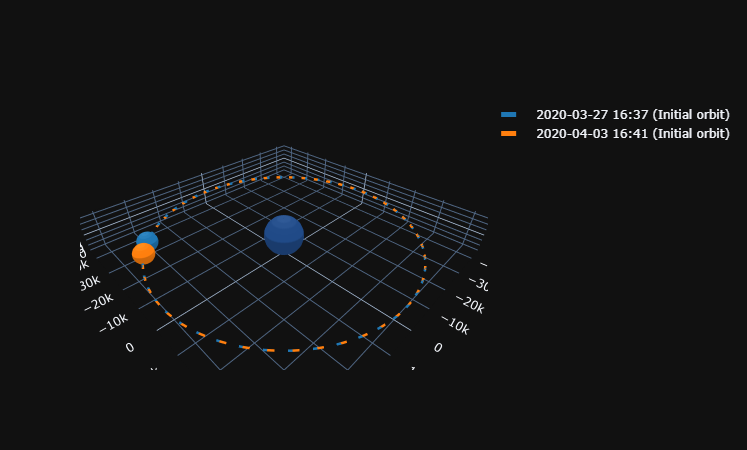

In [228]:
op = OrbitPlotter3D(dark=True)

op.plot(s0, label="Initial orbit")
op.plot(sf, label="Initial orbit")

In [6]:
from poliastro.twobody.thrust import change_inc_ecc
from poliastro.twobody import Orbit
from poliastro.bodies import Earth
from poliastro.twobody.propagation import cowell

In [56]:
from poliastro.plotting import OrbitPlotter2D, OrbitPlotter3D, StaticOrbitPlotter

In [132]:
from astropy import units as u
from astropy.time import Time ,TimeDelta

In [171]:
a = 42166.067 * u.km

ecc_0 = 190.16550e-6 * u.one
inc_0 = 0.028903854 * u.deg
raan_0 = 226.36206 * u.deg
argp_0 = 159.78475 * u.deg
tanom_0 = 262.28040 * u.deg

ecc_f = 189.75690e-6* u.one
inc_f = 0.028902510 * u.deg
raan_f = 226.35704 * u.deg
argp_f = 151.45460 * u.deg
tanom_f = 270.59398 * u.deg

ΔV = 0.04259823
secs = 131.76
accel = ΔV/secs
epoch_0 = Time(datetime.strptime("2020/04/09 13:37:16.833", "%Y/%m/%d %H:%M:%S.%f"), format="datetime")

s1 = Orbit.from_classical(Earth, a, ecc_0, inc_0, raan_0, argp_0, tanom_0, epoch=epoch_0)
a_d, _, _, t_f = change_inc_ecc(s0, ecc_f, inc_f, accel)
sf = s0.propagate(t_f * u.s, method=cowell, ad=a_d, rtol=1e-8)

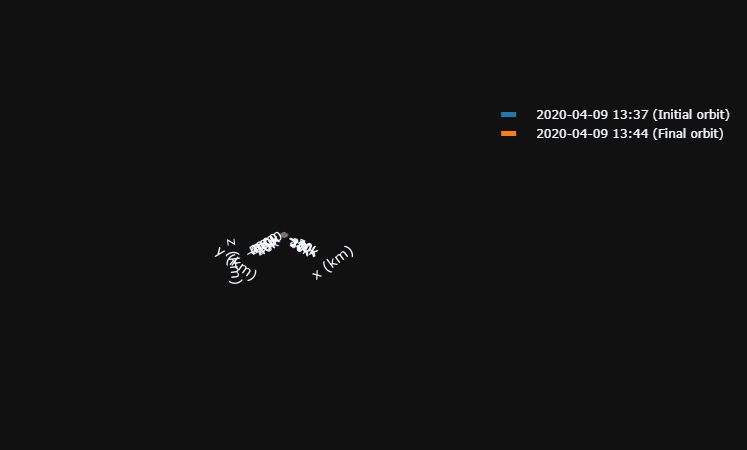

In [65]:
op = OrbitPlotter3D(dark=True)

op.plot(s0, label="Initial orbit")
op.plot(sf, label="Final orbit")

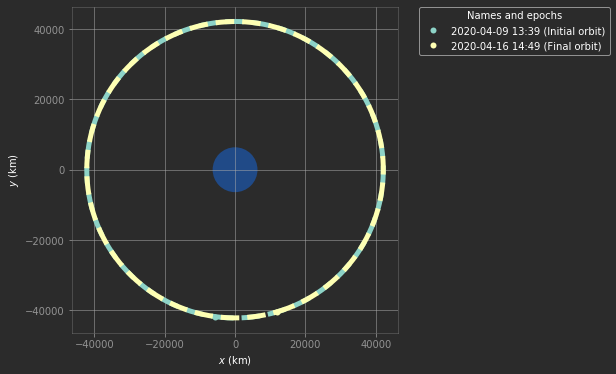

In [59]:
op = StaticOrbitPlotter()

op.plot(s0, label="Initial orbit")
op.plot(sf, label="Final orbit");